# Creating Data Subsets

In [1]:
import cudf
import sys
import pandas as pd
import time

from cuml import make_regression, train_test_split
from cuml.linear_model import LinearRegression as LinearRegression_rapids
from cuml.neighbors import KNeighborsRegressor as KNeighborsRegressor_rapids
from sklearn.linear_model import LinearRegression as LinearRegression_sklearn
from sklearn.neighbors import KNeighborsRegressor as KNeighborsRegressor_sklearn

## Creating Tests

In [2]:
NUM_START_SAMPLES = 2500

NUM_EXECUTIONS_PER_TEST = 3

NUM_DSIZE_DOUBLINGS = 10

RANDOM_STATE = 23

NUM_FEATURES = 399

In [3]:
def linear_regression_rapids():    
    ols = LinearRegression_rapids(fit_intercept=True,
                                       normalize=True,
                                       algorithm='eig')    
    # Starting timer
    t0 = time.time()   

    for i in range(0,NUM_EXECUTIONS_PER_TEST):
        ols.fit(X, y)

    # Stopping clock
    t1 = time.time()

    # Recording Results
    total_time = t1-t0
    avg_time = total_time/NUM_EXECUTIONS_PER_TEST
    
    del ols

    return total_time, avg_time

def k_nearest_neighbour_regression_rapids():
    knn = KNeighborsRegressor_rapids(n_neighbors=5)
    
    # Starting timer
    t0 = time.time()   

    for i in range(0,NUM_EXECUTIONS_PER_TEST):
        knn.fit(X, y)

    # Stopping clock
    t1 = time.time()

    # Recording Results
    total_time = t1-t0
    avg_time = total_time/NUM_EXECUTIONS_PER_TEST
    
    del knn

    return total_time, avg_time

def linear_regression_sklearn():    
    ols = LinearRegression_sklearn(fit_intercept=True,
                                   normalize=True,
                                   n_jobs=-1) 
    # Starting timer
    t0 = time.time()   

    for i in range(0,NUM_EXECUTIONS_PER_TEST):
        ols.fit(X, y)

    # Stopping clock
    t1 = time.time()

    # Recording Results
    total_time = t1-t0
    avg_time = total_time/NUM_EXECUTIONS_PER_TEST

    return total_time, avg_time

def k_nearest_neighbour_sklearn():
    knn = KNeighborsRegressor_sklearn(n_neighbors=5)
    
    # Starting timer
    t0 = time.time()   

    for i in range(0,NUM_EXECUTIONS_PER_TEST):
        knn.fit(X, y)

    # Stopping clock
    t1 = time.time()

    # Recording Results
    total_time = t1-t0
    avg_time = total_time/NUM_EXECUTIONS_PER_TEST

    return total_time, avg_time


## Executing Tests

### RAPIDS

In [4]:
results = []

for i in range(0, NUM_DSIZE_DOUBLINGS):
    print('Test:', i)
    if i == 0:
        n_samples = NUM_START_SAMPLES
    else:
        n_samples = n_samples * 2
        
    # Creating the data
    X, y = make_regression(n_samples=n_samples, n_features=NUM_FEATURES, random_state=RANDOM_STATE)
    
    # Using a cudf dataframe causes a big slowdown, so its comented out
#     X = cudf.DataFrame(X)
#     y = cudf.DataFrame(y)[0]
        
    # ******************************************************************************
    # LINEAR REGRESSION TEST
    
    test = {'Test':'Linear Regression'}
    total_time, avg_time = linear_regression_rapids()
    test['Total'] = total_time
    test['Average'] = avg_time
    
    results.append(test)
    
    # ******************************************************************************
    
    # K NEAREST NEIGHBOUR TEST
    
    test = {'Test':'K Nearest Neighbour'}
    total_time, avg_time = k_nearest_neighbour_regression_rapids()
    test['Total'] = total_time
    test['Average'] = avg_time
    
    results.append(test)
    
    # ******************************************************************************
        
results_df_rapids = pd.DataFrame(results)
results_df_rapids.head()

Test: 0
Test: 1
Test: 2
Test: 3
Test: 4
Test: 5
Test: 6
Test: 7
Test: 8
Test: 9


,Test,Total,Average
0,Linear Regression,0.168844,0.056281
1,K Nearest Neighbour,0.001238,0.000413
2,Linear Regression,0.090115,0.030038
3,K Nearest Neighbour,0.002375,0.000792
4,Linear Regression,0.098703,0.032901


### PANDAS

In [5]:
results = []

for i in range(0, NUM_DSIZE_DOUBLINGS):
    print('Test:', i)
    
    if i == 0:
        n_samples = NUM_START_SAMPLES
    else:
        n_samples = n_samples * 2
        
    # Creating the data
    X, y = make_regression(n_samples=n_samples, n_features=NUM_FEATURES, random_state=RANDOM_STATE)
    
    X = cudf.DataFrame(X).to_pandas()
    y = cudf.DataFrame(y).to_pandas()
    
    dfSize_GB = sys.getsizeof(pd.concat([X,y],axis=1)) * 10**(-9)
    
        
    # ******************************************************************************
    # LINEAR REGRESSION TEST
    
    test = {'Test Size':dfSize_GB, 'Test':'Linear Regression'}
    total_time, avg_time = linear_regression_sklearn()
    test['Total'] = total_time
    test['Average'] = avg_time
    
    results.append(test)
    
    # ******************************************************************************
    
    # K NEAREST NEIGHBOUR TEST
    
    test = {'Test Size':dfSize_GB, 'Test':'K Nearest Neighbour'}
    total_time, avg_time = k_nearest_neighbour_sklearn()
    test['Total'] = total_time
    test['Average'] = avg_time
    
    results.append(test)
    
    # ******************************************************************************

        
results_df_sklearn = pd.DataFrame(results)
results_df_sklearn

/home/aidan/miniconda3/envs/rapids-21.12/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/aidan/miniconda3/envs/rapids-21.12/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


/home/aidan/miniconda3/envs/rapids-21.12/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/aidan/miniconda3/envs/rapids-21.12/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


/home/aidan/miniconda3/envs/rapids-21.12/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/aidan/miniconda3/envs/rapids-21.12/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


,Test Size,Test,Total,Average
0,0.004,Linear Regression,0.626444,0.208815
1,0.004,K Nearest Neighbour,0.018650,0.006217
2,0.008,Linear Regression,0.823474,0.274491
3,0.008,K Nearest Neighbour,0.014654,0.004885
4,0.016,Linear Regression,1.049677,0.349892
5,0.016,K Nearest Neighbour,0.033156,0.011052
6,0.032,Linear Regression,1.727234,0.575745
7,0.032,K Nearest Neighbour,0.031235,0.010412
8,0.064,Linear Regression,4.268392,1.422797
9,0.064,K Nearest Neighbour,0.056280,0.018760


## Results

In [6]:
results_df = pd.concat( 
    [
        pd.concat({"Pandas": results_df_sklearn}, axis=1), 
        pd.concat({"Rapids": results_df_rapids}, axis=1)
    ],
    axis=1
)
results_df.head()

Pandas                                                        Rapids  \
  Test Size                 Test     Total   Average                 Test   
0     0.004    Linear Regression  0.626444  0.208815    Linear Regression   
1     0.004  K Nearest Neighbour  0.018650  0.006217  K Nearest Neighbour   
2     0.008    Linear Regression  0.823474  0.274491    Linear Regression   
3     0.008  K Nearest Neighbour  0.014654  0.004885  K Nearest Neighbour   
4     0.016    Linear Regression  1.049677  0.349892    Linear Regression   

                       
      Total   Average  
0  0.168844  0.056281  
1  0.001238  0.000413  
2  0.090115  0.030038  
3  0.002375  0.000792  
4  0.098703  0.032901

## Vizualization

In [7]:
import os
os.environ[ 'MPLCONFIGDIR' ] = '/tmp/'
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Defining the plot that is used
def plot(axs, averages_pandas, averages_rapids, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Scikit-Learn')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')

    axs.set_ylabel('Average Time (s)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=12)
    axs.legend(loc='upper right')
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    return axs

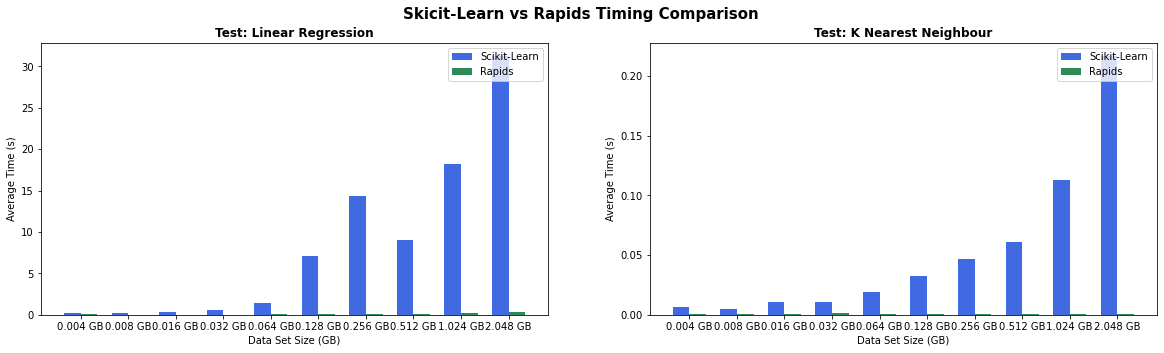

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 5)

fig.suptitle('Skicit-Learn vs Rapids Timing Comparison', fontsize=15, fontweight="bold")

# Setting the number of bars
ind = np.arange(NUM_DSIZE_DOUBLINGS)

# Defining the width between the bars
width = 0.35

# Defining the bar labels
bar_labels = np.round(results_df_sklearn['Test Size'].drop_duplicates(), 3).astype(str) + " GB"

plot(ax1, 
     results_df_sklearn[results_df_sklearn['Test'] == 'Linear Regression']['Average'],
     results_df_rapids[results_df_rapids['Test'] == 'Linear Regression']['Average'],
     'Linear Regression')

plot(ax2, 
     results_df_sklearn[results_df_sklearn['Test'] == 'K Nearest Neighbour']['Average'],
     results_df_rapids[results_df_rapids['Test'] == 'K Nearest Neighbour']['Average'],
     'K Nearest Neighbour')
plt.savefig('scikit-learn_v_rapids.png')
plt.show()